**Built on Google colab. Best viewed in the dark theme**

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from pandas import DataFrame as df
import datetime
from tqdm import tqdm
import pandas as pd
from PIL import Image
from PIL import ImageEnhance
pd.set_option('display.max_colwidth', -1)

In [0]:
items=glob.glob('/gdrive/My Drive/Capstone project images/color/Grape*/*.JPG',recursive=True)
data=df(columns=['Item'],data=items)
data['Folder']=data['Item'].str.rsplit('/', 1, expand=True)[0]
data['Folder']=data['Folder'].str.rsplit('/', 1, expand=True)[1]
data['Species']=data['Folder'].str.rsplit('___', 1, expand=True)[0]
data['Disease']=data['Folder'].str.rsplit('___', 1, expand=True)[1]
data['Image Path']=data['Item']
data.drop(['Species','Item','Folder'],axis=1,inplace=True)
data.head()

,Disease,Image Path
0,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/460f1783-64fd-4398-9859-25242f4e1614___FAM_B.Msls 1124.JPG
1,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/46b1f2e5-daa8-4270-bb0b-aee8c0737e91___FAM_B.Msls 4135.JPG
2,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/46cb7bd4-29df-41b7-9c56-8bf84ea8295d___FAM_B.Msls 1126.JPG
3,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/46d513d3-a4ff-4ec6-b123-867c3dc15f48___FAM_B.Msls 1174.JPG
4,Esca_(Black_Measles),/gdrive/My Drive/Capstone project images/color/Grape___Esca_(Black_Measles)/47274876-8fe2-4ad8-8e5d-08e3b96ac5d0___FAM_B.Msls 1341.JPG


In [0]:
contrast=[]
color=[]
for img in tqdm(data['Image Path']):
  image = Image.open(img)
  color.append(np.asarray(image))
  enhancer_object = ImageEnhance.Contrast(image)
  out = enhancer_object.enhance(1.4)
  contrast.append(np.asarray(out))

100%|██████████| 4062/4062 [00:20<00:00, 199.48it/s]


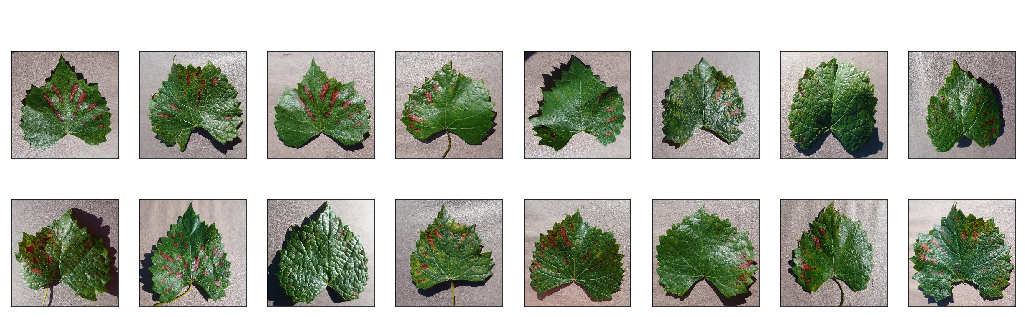

In [0]:
plt.figure(figsize=(18,5))
i=0
for img in color[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Color", fontsize=20,color='w')
plt.show()

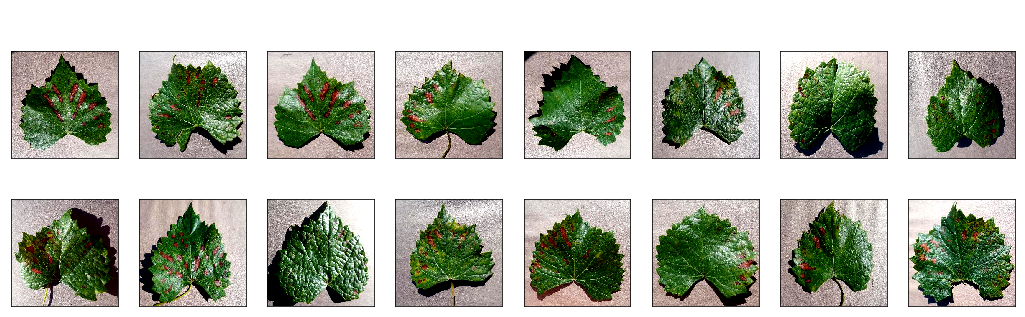

In [0]:
plt.figure(figsize=(18,5))
i=0
for img in contrast[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Enhanced contrast", fontsize=20,color='w')
plt.show()

In [0]:
gray=[]
for img in contrast:
  gray.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

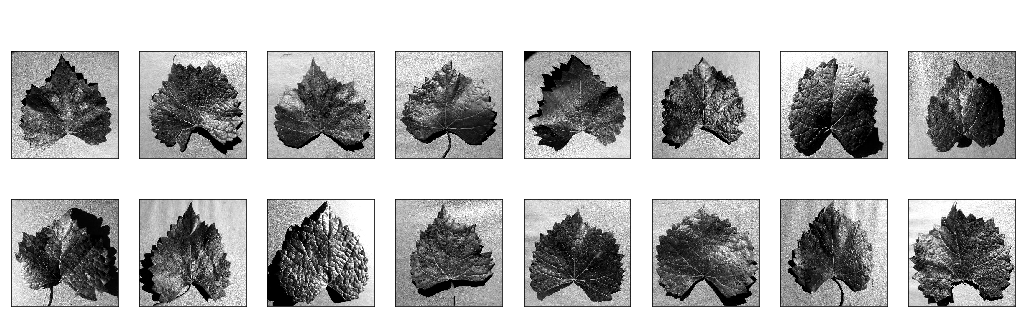

In [0]:
plt.figure(figsize=(18,5))
i=0
for grayimg in gray[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(grayimg, cv2.COLOR_GRAY2RGB))
  i+=1
plt.suptitle("Grayscale", fontsize=20,color='w')
plt.show()

In [0]:
thresh=[]
for grayimg in gray:
  th, threshed = cv2.threshold(grayimg, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
  thresh.append(threshed)

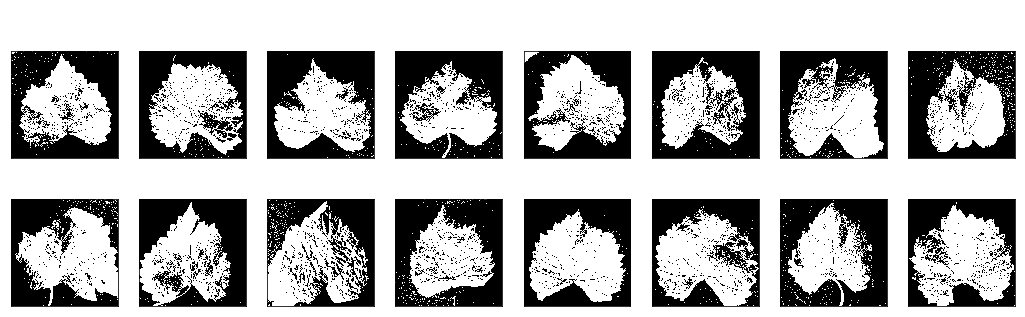

In [0]:
plt.figure(figsize=(18,5))
i=0
for threshimg in thresh[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(threshimg,cmap='gray')
  i+=1
plt.suptitle("Threshold", fontsize=20,color='w')
plt.show()

In [0]:
masked=[]
segmented=[]
i=0
for threshimg in thresh:
  cnts = cv2.findContours(threshimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
  cnts = sorted(cnts, key=cv2.contourArea,reverse=True)
  cnt=cnts[0]
  mask = np.zeros(color[i].shape[:2],np.uint8)
  masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
  cv2.drawContours(mask, [cnt],-1, 255, -1)
  dst = cv2.bitwise_and(color[i], color[i], mask=mask)
  segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  i+=1

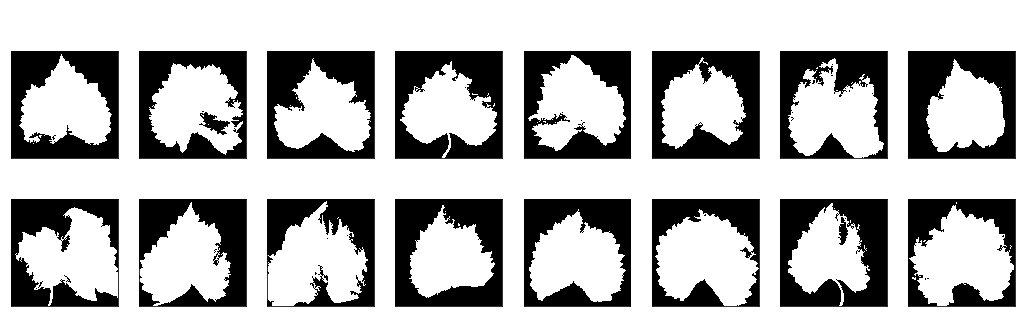

In [0]:
plt.figure(figsize=(18,5))
i=0
for maskimg in masked[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(maskimg,cmap='gray')
  i+=1
plt.suptitle("Mask", fontsize=20,color='w')
plt.show()

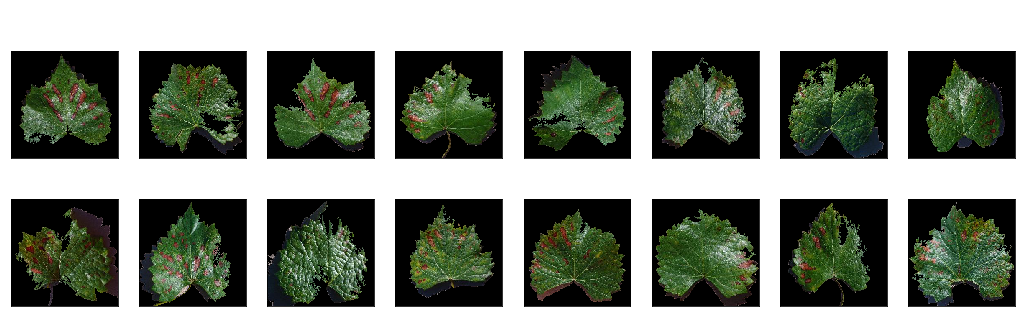

In [0]:
plt.figure(figsize=(18,5))
i=0
for segimg in segmented[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(segimg, cv2.COLOR_BGR2RGB))
  i+=1
plt.suptitle("Segmented", fontsize=20,color='w')
plt.show()

In [0]:
i=0
for image in tqdm(segmented):
  cv2.imwrite(data['Image Path'][i].rsplit('/',3)[0]+'/processed/'+data['Image Path'][i].rsplit('/',2)[1]+'/'+data['Image Path'][i].rsplit('/',2)[2], image)#cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  i+=1


100%|██████████| 4062/4062 [16:06<00:00,  3.87it/s]
